## Week 10
## DSC 630
## Abed Tabbalat

In [144]:
# Base library import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Warning Skip
import warnings
warnings.filterwarnings("ignore")

In [145]:
# Importing movie dataset
df_movie = pd.read_csv('movies.csv')
df_movie

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [146]:
# Movie data type
df_movie.dtypes

movieId     int64
title      object
genres     object
dtype: object

In [147]:
# Movie data description
df_movie.describe().T

,count,mean,std,min,25%,50%,75%,max
movieId,9742.0,42200.353623,52160.494854,1.0,3248.25,7300.0,76232.0,193609.0


In [148]:
# Importing rating dataset
df_rating = pd.read_csv('ratings.csv')
df_rating

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [149]:
# Rating data type
df_rating.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

In [150]:
# Rating data description
df_rating.describe().T

,count,mean,std,min,25%,50%,75%,max
userId,100836.0,3.261276e+02,1.826185e+02,1.0,1.770000e+02,3.250000e+02,4.770000e+02,6.100000e+02
movieId,100836.0,1.943530e+04,3.553099e+04,1.0,1.199000e+03,2.991000e+03,8.122000e+03,1.936090e+05
rating,100836.0,3.501557e+00,1.042529e+00,0.5,3.000000e+00,3.500000e+00,4.000000e+00,5.000000e+00
timestamp,100836.0,1.205946e+09,2.162610e+08,828124615.0,1.019124e+09,1.186087e+09,1.435994e+09,1.537799e+09


In [151]:
# Merging both datasets using movieId as the identifier
df = pd.merge(df_movie, df_rating)
df

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


In [152]:
# Dropping genres and timestamp as they are not needed for this exercise & adding count column
df = df.drop(['genres', 'timestamp'], axis=1)
df

,movieId,title,userId,rating
0,1,Toy Story (1995),1,4.0
1,1,Toy Story (1995),5,4.0
2,1,Toy Story (1995),7,4.5
3,1,Toy Story (1995),15,2.5
4,1,Toy Story (1995),17,4.5
...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),184,4.0
100832,193583,No Game No Life: Zero (2017),184,3.5
100833,193585,Flint (2017),184,3.5
100834,193587,Bungo Stray Dogs: Dead Apple (2018),184,3.5


### Data Exploration

In [153]:
# Quick exercise to see the top rates and most rated stats
df_avg = pd.DataFrame(df.groupby('title')['rating'].mean())
df_avg['count'] = pd.DataFrame(df.groupby('title')['rating'].count())
df_avg

,rating,count
title,,
'71 (2014),4.000000,1
'Hellboy': The Seeds of Creation (2004),4.000000,1
'Round Midnight (1986),3.500000,2
'Salem's Lot (2004),5.000000,1
'Til There Was You (1997),4.000000,2
...,...,...
eXistenZ (1999),3.863636,22
xXx (2002),2.770833,24
xXx: State of the Union (2005),2.000000,5


In [154]:
# Sorting by top rated
df_avg = df_avg.sort_values(by=['rating', 'count'], ascending=False)
df_avg = df_avg.reset_index()


In [155]:
df_avg.sort_values(by=['count', 'rating'], ascending=False)

,title,rating,count
1035,Forrest Gump (1994),4.164134,329
722,"Shawshank Redemption, The (1994)",4.429022,317
971,Pulp Fiction (1994),4.197068,307
1038,"Silence of the Lambs, The (1991)",4.161290,279
972,"Matrix, The (1999)",4.192446,278
...,...,...,...
9714,"Wasp Woman, The (1959)",0.500000,1
9715,While the City Sleeps (1956),0.500000,1
9716,Wizards of the Lost Kingdom II (1989),0.500000,1
9717,Yongary: Monster from the Deep (1967),0.500000,1


Text(0.5, 1.0, 'Rating Histogram')

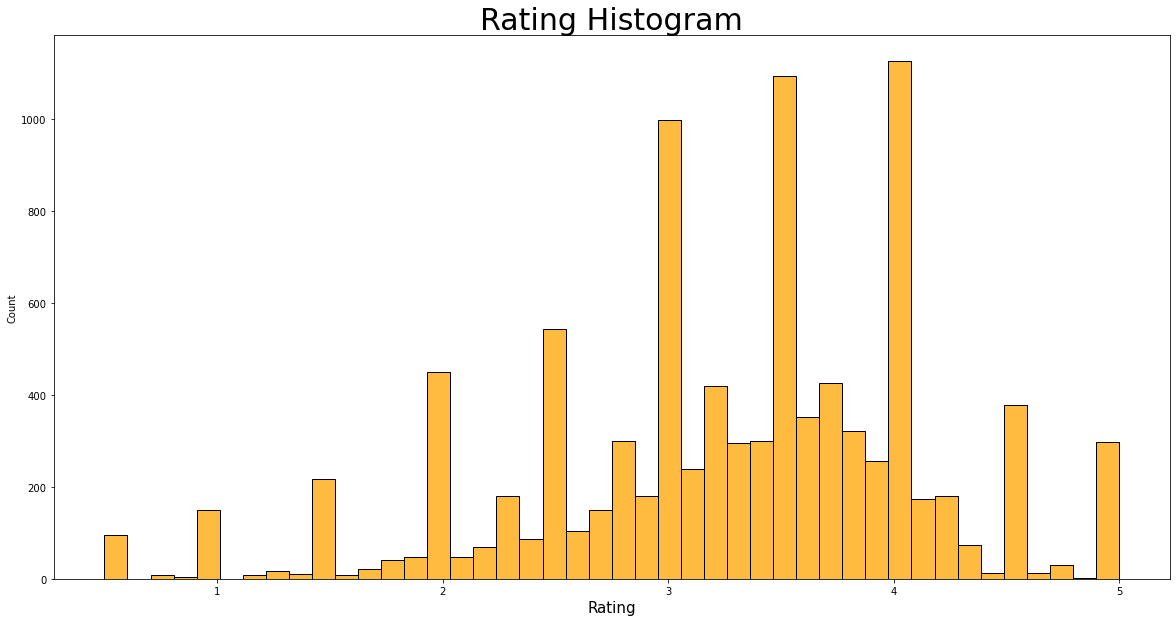

In [156]:
# plotting rating distribution
plt.figure(figsize=(20,10))
sns.histplot(df_avg['rating'], color='orange')
plt.xlabel('Rating', fontsize=15)
plt.title('Rating Histogram', fontsize=30)

Text(0.5, 1.0, 'Rating vs Rating Count')

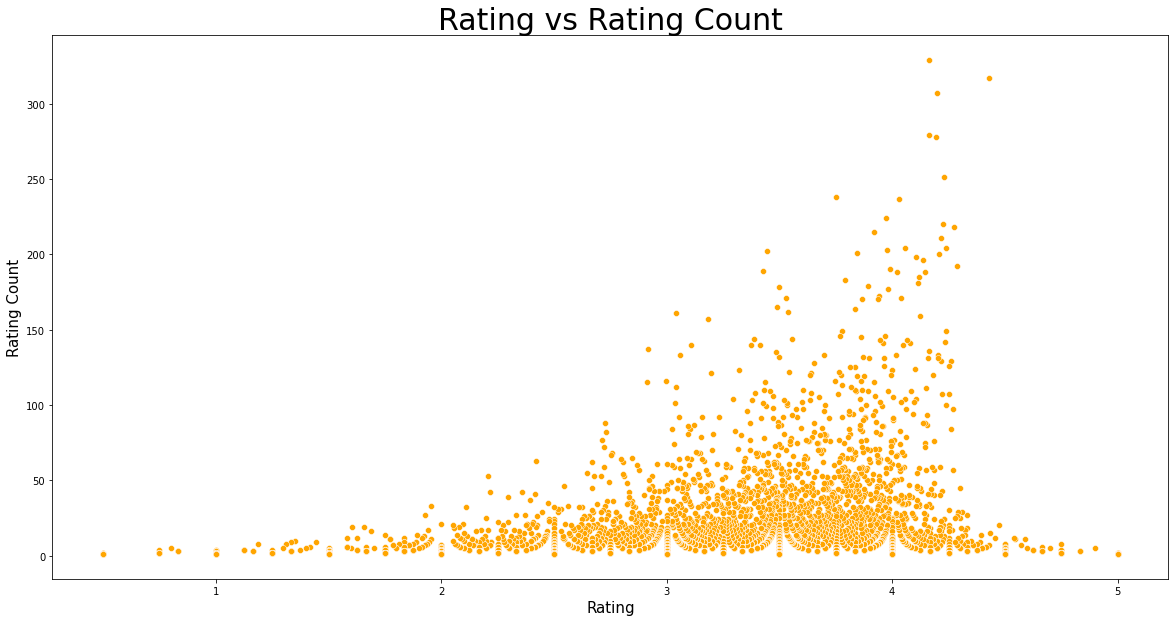

In [157]:
# plotting Ratings vs Count as a scatter plot
plt.figure(figsize=(20,10))
sns.scatterplot(x=df_avg['rating'], y=df_avg['count'],color='orange')
plt.xlabel('Rating', fontsize=15)
plt.ylabel('Rating Count', fontsize=15)
plt.title('Rating vs Rating Count', fontsize=30)

### Recommender System

In [158]:
# Creating a pivot table to reshape the data
df_pivot = df.pivot_table(index=['userId'], columns=['title'], values='rating')
df_pivot

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN


In [159]:
# Creating recommender through correlation
movie_input = "Shawshank Redemption, The (1994)"
index1 = list(range(5))
df_pivot_corr = df_pivot.corrwith(df_pivot[movie_input])
result = pd.DataFrame(data=df_pivot_corr, columns=['Correlation'])
result = result.dropna().sort_values(by='Correlation', ascending=False)
result.head()

,Correlation
title,
"Principal, The (1987)",1.0
Outlander (2008),1.0
Chi-Raq (2015),1.0
"Changeling, The (1980)",1.0
Rififi (Du rififi chez les hommes) (1955),1.0


In [160]:
# Printing results to recommend movies
print(f'Because you watched {movie_input}, we recommend:')
print(f'{len(f"Because you watched {movie_input}, we recommend:") * "-"}\n')
for i in index1:
    print(result.index[i])

Because you watched Shawshank Redemption, The (1994), we recommend:
-------------------------------------------------------------------

Principal, The (1987)
Outlander (2008)
Chi-Raq (2015)
Changeling, The (1980)
Rififi (Du rififi chez les hommes) (1955)


Sources: https://www.kaggle.com/code/kanncaa1/recommendation-systems-tutorial